In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [76]:
data = pd.read_csv(r'details_full.csv', sep=',')
data.datum = pd.to_datetime(data.datum)

In [66]:
data.columns

Index(['OBJECTID', 'X', 'Y', 'id', 'obec', 'datum', 'komunikace_druh',
       'komunikace_cislo', 'zavineni', 'ridic_kategorie', 'ridic_ovlivneni',
       'vinik_alkohol', 'ridic_stav', 'obeti_usmrceno', 'obeti_lehce',
       'obeti_tezce', 'vozidel_celkem', 'vinik_vozidlo_znacka',
       'vinik_vozidlo_po_nehode', 'skoda', 'unik_hmot', 'vinik_vozidlo_druh',
       'vinik_vozidlo_rok_vyroby', 'vinik_vozidlo_vlastnik',
       'vinik_skoda_na_vozidle', 'vyprosteni', 'nehoda_charakter',
       'srazka_vozidel_druh', 'hlavni_priciny', 'povrch_stav', 'meteo',
       'rozhled', 'nehoda_poloha', 'prednost_v_jizde', 'smerove_podminky',
       'druh_krizujici_komunikace', 'smer_jizdy', 'nehoda_druh',
       'pevna_prekazka_druh', 'povrch_druh', 'komunikace_stav', 'viditelnost',
       'komunikace_deleni', 'rizeni_provozu', 'objekty', 'misto_nehody',
       'smyk'],
      dtype='object')

In [83]:
data.viditelnost.value_counts()

ve dne, viditelnost nezhoršená vlivem po    18785
v noci - s veřejným osvětlením,viditelno     5712
v noci - bez veřejného osvětlení,viditel     1831
v noci - s veřejným osvětlením, zhoršená     1452
ve dne, zhoršená viditelnost vlivem pově     1398
ve dne, zhoršená viditelnost (svítání,so     1050
v noci - bez veřejného osvětlení, vidite      361
dtype: int64

In [82]:
len(data[(data.zavineni == 'chodcem') & (data.objekty == 'přechod pro chodce')])/len(data[data.objekty == 'přechod pro chodce'])

0.1561002580169554

In [78]:
len(data[data.objekty == 'přechod pro chodce'])/len(data)

0.3547680538755762

In [80]:
#po letech
hs = data.datum.value_counts()
hs.resample('A', how='sum')#.plot('bar')

2007-12-31    4224
2008-12-31    4010
2009-12-31    3663
2010-12-31    3481
2011-12-31    3401
2012-12-31    3571
2013-12-31    3442
2014-12-31    3492
2015-12-31    1305
Freq: A-DEC, dtype: int64

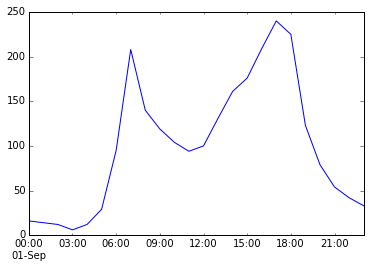

In [21]:
#rozložení po hodinách
hs = data.cas.value_counts()
hs.resample('H', how='sum').plot()

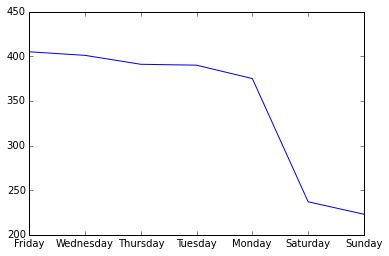

In [20]:
#rozložení po dnech v týdnu
data['den'] = data.datum.apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').strftime('%A'))
data.den.value_counts().plot()

In [7]:
#rozložení po měsících
data['mesic'] = data.datum.apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').strftime('%b'))
data.mesic.value_counts().plot()

In [8]:
data.datum.value_counts().resample('A', how='sum')

2007-12-31    73
2008-12-31    71
2009-12-31    84
2010-12-31    66
2011-12-31    67
2012-12-31    70
2013-12-31    69
2014-12-31    47
2015-12-31    15
Freq: A-DEC, dtype: int64

In [9]:
ts = pd.Series(data[(data.objekty == 'přechod pro chodce') & ((data.obeti_usmrceno >= 1) | (data.obeti_tezce >= 1))].datum.value_counts())
dat = pd.DataFrame(ts.resample('H', how='sum'))

In [10]:
#zavinění na přechodu
len(data[(data.objekty == 'přechod pro chodce') & (data.zavineni == 'chodcem')]) / len(data[(data.objekty == 'přechod pro chodce')])

0.15480427046263345

In [11]:
#úmrtí na přechodu
len(data[(data.objekty == 'přechod pro chodce') & (data.obeti_usmrceno >= 1)]) / len(data[(data.objekty == 'přechod pro chodce')])

0.06761565836298933